In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
)

X_train = np.load("./data/X_train_scaled.npy")
X_test = np.load("./data/X_test_scaled.npy")
y_train = np.load("./data/y_train.npy")
y_test = np.load("./data/y_test.npy")

In [ ]:
# Funcion auxiliar para evaluar modelos
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_proba))
    print("F1:", f1_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000)
log_reg.fit(X_train, y_train)

evaluate_model(log_reg, X_test, y_test, "Logistic Regression")



=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9967    0.8133    0.8957    239020
           1     0.0431    0.7587    0.0816      2652

    accuracy                         0.8127    241672
   macro avg     0.5199    0.7860    0.4887    241672
weighted avg     0.9863    0.8127    0.8868    241672

Confusion Matrix:
 [[194384  44636]
 [   640   2012]]
AUC: 0.8679337025130142
F1: 0.08162271805273834
Precision: 0.04313153832961756
Recall: 0.7586726998491704


In [8]:
# Ramdom Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)
rf.fit(X_train, y_train)

evaluate_model(rf, X_test, y_test, "Random Forest")


=== Random Forest ===
              precision    recall  f1-score   support

           0     0.9959    0.8596    0.9227    239020
           1     0.0509    0.6784    0.0947      2652

    accuracy                         0.8576    241672
   macro avg     0.5234    0.7690    0.5087    241672
weighted avg     0.9855    0.8576    0.9136    241672

Confusion Matrix:
 [[205463  33557]
 [   853   1799]]
AUC: 0.8583125439435765
F1: 0.09466428120395706
Precision: 0.05088245276615002
Recall: 0.6783559577677225


In [9]:
# XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # balanceo de clases
    eval_metric="logloss",
    tree_method="hist",  # más rápido
    random_state=42
)
xgb.fit(X_train, y_train)

evaluate_model(xgb, X_test, y_test, "XGBoost")


=== XGBoost ===
              precision    recall  f1-score   support

           0     0.9968    0.8332    0.9077    239020
           1     0.0479    0.7568    0.0902      2652

    accuracy                         0.8324    241672
   macro avg     0.5224    0.7950    0.4989    241672
weighted avg     0.9864    0.8324    0.8987    241672

Confusion Matrix:
 [[199163  39857]
 [   645   2007]]
AUC: 0.8771607721537151
F1: 0.09016982657920748
Precision: 0.04794095165297153
Recall: 0.7567873303167421


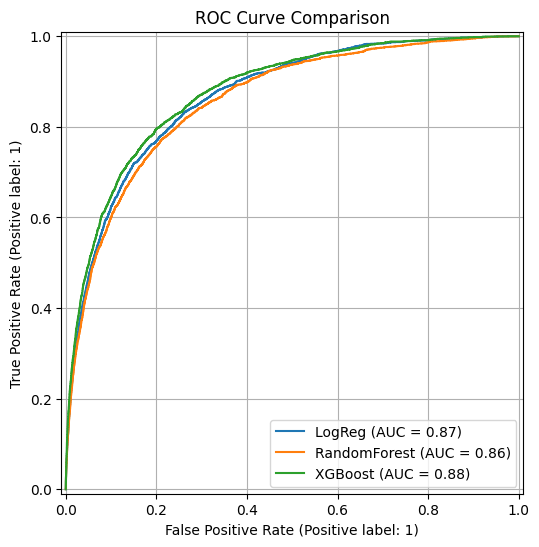

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(log_reg, X_test, y_test, name="LogReg", ax=ax)
RocCurveDisplay.from_estimator(rf, X_test, y_test, name="RandomForest", ax=ax)
RocCurveDisplay.from_estimator(xgb, X_test, y_test, name="XGBoost", ax=ax)
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.show()
